# Actividad


---
Por: Ángela Córdoba


---




In [1]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Generar datos para una serie de tiempo sintética
np.random.seed(0) # Fijar semilla para reproducibilidad
n_samples = 200 # Número de puntos de datos en la serie de tiempo
t = np.arange(n_samples) # Valores de tiempo

# Crear una serie de tiempo sintética creciente
time_series = 0.1*t +np.random.randn(n_samples)

In [3]:
# División de datos
train_size = int(len(time_series) * 0.8) # Tamaño del conjunto de entrenamiento
train_data, test_data = time_series[:train_size], time_series[train_size:]

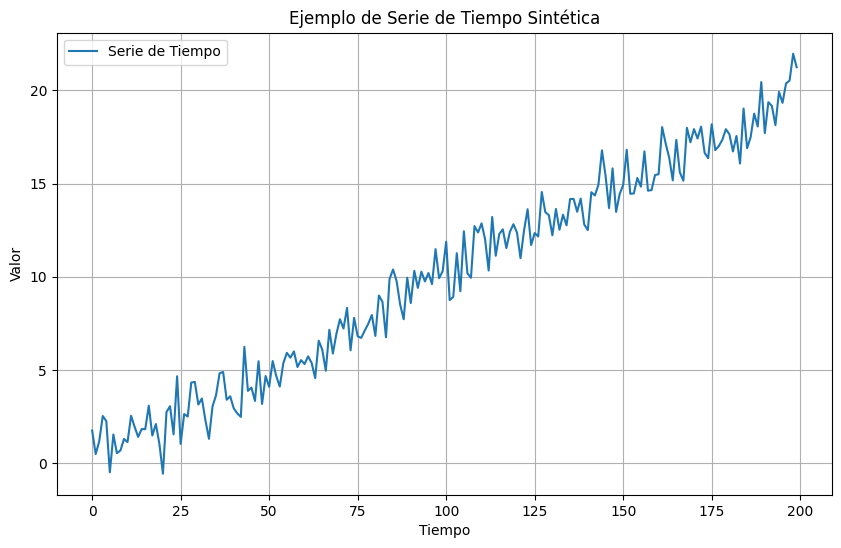

In [4]:
# Visualización
plt.figure(figsize=(10, 6))
plt.plot(t, time_series, label='Serie de Tiempo')
plt.title('Ejemplo de Serie de Tiempo Sintética')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
# Preparación datos
def create_dataset(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

# Definimos el número de pasos de tiempo para la serie temporal
seq_length = 16

# Creamos las secuencias de entrenamiento y prueba en formato 3D
X_train, y_train = create_dataset(train_data, seq_length)
X_test, y_test = create_dataset(test_data, seq_length)

In [6]:
# Construcción modelo LSTM
model = Sequential()
model.add(LSTM(32,
               activation='relu',
               input_shape=(seq_length, 1),
               return_sequences=True))
model.add(LSTM(32, activation='relu'))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
# Compilar modelo
model.compile(optimizer='adam', loss='mse')

In [8]:
# Entrenamiento del modelo
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 143.8402
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 76.2875
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 30.9574
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 10.4143
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 3.4216
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.7744
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1.6730
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1.5112
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1.2315
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1.2306
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1.1301
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1.1658
Epoch 13/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1.0014
Epoch 14/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 1.0582
Epoch 15/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1.0240
Epoch 16/100
5

In [9]:
# Evaluación del modelo
Evaluación = model.evaluate(X_test, y_test)
print(Evaluación)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step - loss: 2.7240
2.723952054977417


In [10]:
print("y_test: \n",y_test)
# Predicción
y_pred = model.predict(X_test)
print("y_pred: \n",y_pred)

y_test: 
 [16.79659034 17.01045022 17.3444675  17.91747916 17.64600609 16.72504871
 17.5563816  16.07659685 19.02523145 16.89794234 17.49561666 18.75216508
 18.060437   20.4430146  17.70714309 19.36705087 19.16071718 18.1319065
 19.92327666 19.32845367 20.37179055 20.52350415 21.96323595 21.23652795]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step
y_pred: 
 [[16.70941 ]
 [16.923403]
 [16.777292]
 [16.763851]
 [16.84684 ]
 [17.048458]
 [16.99777 ]
 [17.090143]
 [17.291515]
 [17.17698 ]
 [17.347246]
 [17.21332 ]
 [17.29001 ]
 [17.29327 ]
 [17.435146]
 [17.679615]
 [17.540747]
 [17.714525]
 [17.76746 ]
 [17.812155]
 [17.953983]
 [18.048306]
 [18.286795]
 [18.50136 ]]


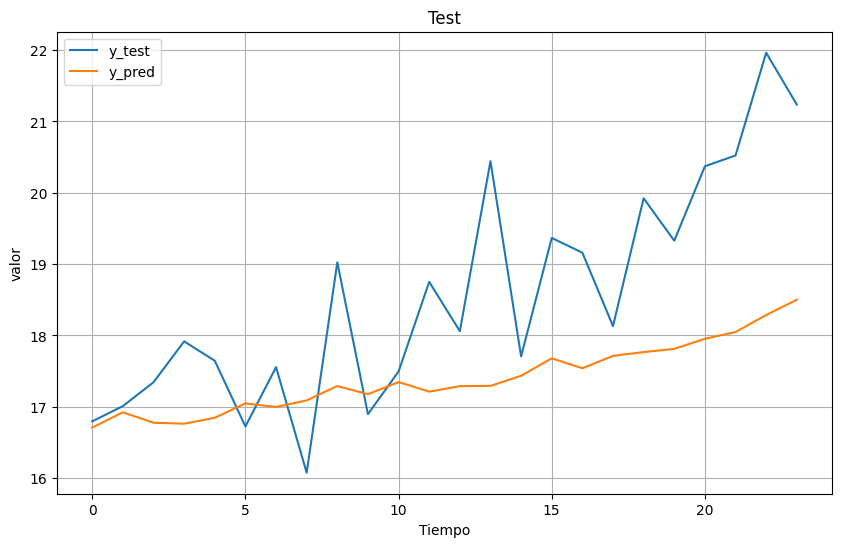

In [11]:
# Visualización de las predicciones (test vs pronóstico)
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='y_test')
plt.plot(y_pred, label='y_pred')
plt.title('Test')
plt.xlabel('Tiempo')
plt.ylabel('valor')
plt.legend()
plt.grid(True)
plt.show()

### Preguntas

**Conceptos Básicos de LSTM y Series de Tiempo:**
* ¿Qué es una serie de tiempo y por qué es importante en el análisis de datos?
> Conjunto de datos ordenados cronológicamente, que representan valores observados de una variable en diferentes puntos en el tiempo. Son importantes porque identifican patrones, realizar predicción y pronóstico de valores y permite tomar decisiones informadas.

* Describa brevemente cómo funciona una red neuronal LSTM y cuál es su ventaja para modelar series de tiempo.
> Las redes neuronales LSTM (Long Short-Term Memory) son un tipo de red neuronal recurrente (RNN) diseñada específicamente para aprender dependencias a largo plazo en secuencias de datos. Funcionan utilizando una arquitectura de celdas especiales que pueden recordar información durante largos periodos y decidir qué información conservar o olvidar.

**Preprocesamiento de Datos:**
* ¿Por qué es importante dividir los datos de serie de tiempo en conjuntos de entrenamiento y prueba?
> Dividir los datos en conjuntos de entrenamiento y prueba es importante porque permite evaluar la capacidad del modelo para generalizar a datos no vistos.

* ¿Qué hace la función create_dataset en el código?
> Crea secuencias de datos de entrada y salida a partir de la serie de tiempo original.

**Construcción y entrenamiento del modelo:**
* Explique la estructura del modelo LSTM creado en el código.
> El modelo LSTM creado en el código es un modelo secuencial en Keras. Incluye capas LSTM con 32 unidades cada una y utiliza la función de activación ReLU. Además, se añade una capa densa para la salida que produce la predicción final.

* ¿Qué significan el parámetro epochs en la función fit?
> El parámetro epochs indica el número de veces que el modelo se entrenará en todo el conjunto de datos de entrenamiento.

**Evaluación del Modelo:**
* ¿Por qué es importante evaluar el modelo con datos de prueba después del entrenamiento?
> Permite verificar si el modelo puede hacer predicciones precisas sobre nuevos datos y no solo sobre los datos con los que fue entrenado.

* ¿Qué medida se utiliza para evaluar el rendimiento del modelo en este caso?
> En este caso, el rendimiento del modelo se evalúa utilizando la función de pérdida de error cuadrático medio (MSE), que mide la diferencia promedio al cuadrado entre las predicciones del modelo y los valores reales.

**Predicción y visualización:**
* ¿Qué representa la variable y_pred en el código?
> La variable y_pred representa las predicciones generadas por el modelo LSTM en los datos de prueba.

* ¿Qué significan los gráficos resultantes de la predicción? ¿Qué conclusiones se pueden sacar de ellos?
> Los gráficos muestran los valores reales de la serie de tiempo de prueba y las predicciones del modelo LSTM. Si las predicciones se alinean bien con los valores reales, esto indica un buen rendimiento del modelo.

**Experimentación y ajuste del modelo:**
* ¿Cómo podría mejorar el rendimiento del modelo LSTM en este caso?
> El rendimiento del modelo LSTM podría mejorarse ajustando los hiperparámetros, aumentando el número de unidades LSTM, incrementando el número de épocas de entrenamiento, o añadiendo capas adicionales al modelo.

* ¿Qué pasaría si aumentara el número de unidades LSTM o la cantidad de épocas de entrenamiento?
> Aumentar el número de unidades LSTM podría permitir al modelo capturar patrones más complejos en los datos. Incrementar el número de épocas de entrenamiento podría mejorar la capacidad del modelo para ajustar sus parámetros.









